In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import Eq, symbols, init_printing, simplify
import time
init_printing()

### Задание исходных данных

In [2]:
#x_, f = Matrix(input().split(' ')), Matrix(input().split(' '))

# Пример
x_ = np.arange(11)
f_ = np.exp(x_)

x = symbols('x')

### Интерполяционный многочлен

Интерполянт методом Ньютона:


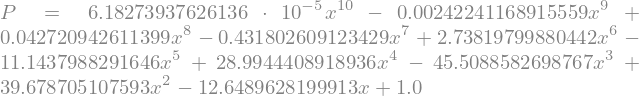

Интерполянт методом Лагранжа:


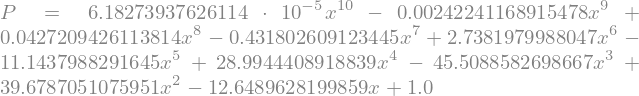

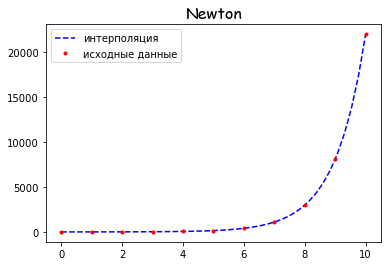

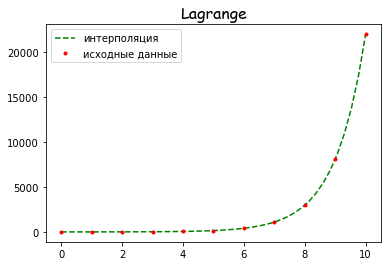

In [7]:
def f(arr, f_, d):
    if len(arr) == 1:
        return d[arr[0]]
    return (f(arr[1 :], f_, d) - f(arr[: len(arr) - 1], f_, d)) / (arr[len(arr) - 1] - arr[0])

class interpolant:
    def __init__(self, x_, f_):
        self.x, self.f, self.P_Lagrange, self.P_Newton = x_, f_, 0, 0
        
    def interpolation(self):
        P = 0
        for k in range(len(x_)):
            l = 1
            for i in range(len(x_)):
                if i != k:
                    l *= (x - x_[i]) / (x_[k] - x_[i])
            P += l * f_[k]
        self.P_Newton = P
        
        d, P, m = dict(zip(x_, f_)), 0, 1
        for i in range(len(x_)):
            P += m * f(x_[0:i + 1], f_, d)
            m *= x - x_[i]
        self.P_Lagrange = P
        
    def printing(self, s):
        if s == 'Newton':
            print('Интерполянт методом Ньютона:')
            display(Eq(symbols('P'), simplify(self.P_Newton)))
        elif s == 'Lagrange':
            print('Интерполянт методом Лагранжа:')
            display(Eq(symbols('P'), simplify(self.P_Lagrange)))
        
    def image(self, s):
        p = []
        x__ = np.linspace(min(x_), max(x_), num = len(x_) * 4)
        if s == 'Newton':
            for i in range(len(x__)):
                p.append(self.P_Newton.subs({x: x__[i]}))
            color_ = 'blue'
        elif s == 'Lagrange':
            for i in range(len(x__)):
                p.append(self.P_Lagrange.subs({x: x__[i]}))
            color_ = 'green'
            
        fig, ax = plt.subplots()
        ax.plot(x__, p, '--', label = 'интерполяция', color = color_)
        ax.plot(self.x, self.f, '.', label = 'исходные данные', color = 'red')
        ax.set_title(s, fontfamily = 'fantasy', size = 16)
        ax.legend()
        plt.show()

P = interpolant(x_, f_)
P.interpolation()
P.printing('Newton')
P.printing('Lagrange')
P.image('Newton')
P.image('Lagrange')